# Exploratory Data Analysis (EDA) on Vehicle Insurance Dataset

In [1]:
# importing major libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# additional libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset
df = pd.read_csv('Vehicle_Insurance.csv')

## Objective of the Project
### Objective:
To analyze a vehicle insurance dataset and find patterns, trends, and factors affecting insurance claims using Exploratory Data Analysis (EDA).

This helps understand:

* Who files more claims

* Which factors increase claim probability

* How premium, age, gender, region, and vehicle age affect claims

In [3]:
# overview data
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#shape 
df.shape

(381109, 12)

In [5]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

## 📊 Dataset Card: Vehicle Insurance Dataset

### 🔹 Dataset Description
This dataset contains customer and vehicle-related information used to analyze factors influencing vehicle insurance policy response. The target variable **Response** indicates whether a customer is interested in the insurance policy.

---

### 🔹 Dataset Shape
- Rows: *Multiple customer records*
- Columns: **12**

---

### 🔹 Column Details

| Column Name | Data Type | Description |
|------------|----------|-------------|
| `id` | Integer | Unique identifier for each customer |
| `Gender` | Categorical | Gender of the customer (Male/Female) |
| `Age` | Integer | Age of the customer |
| `Driving_License` | Binary (0/1) | Indicates whether the customer has a driving license (1 = Yes, 0 = No) |
| `Region_Code` | Categorical (Encoded) | Code representing the customer’s region |
| `Previously_Insured` | Binary (0/1) | Indicates whether the customer was previously insured |
| `Vehicle_Age` | Categorical | Age of the vehicle (`< 1 Year`, `1-2 Year`, `> 2 Years`) |
| `Vehicle_Damage` | Binary (Yes/No) | Indicates whether the vehicle was previously damaged |
| `Annual_Premium` | Float | Annual insurance premium amount |
| `Policy_Sales_Channel` | Categorical (Encoded) | Channel through which the policy was sold |
| `Vintage` | Integer | Number of days the customer has been associated with the company |
| `Response` | Binary (0/1) | Target variable indicating customer interest (1 = Interested, 0 = Not Interested) |

---

### 🔹 Target Variable
- **Response**
  - `1` → Customer is interested in the insurance policy
  - `0` → Customer is not interested in the insurance policy

---


In [6]:
# Seaking Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
# Seeking description
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
#Checking missing value
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# Handle Missing Values
df.fillna(df.median(numeric_only=True), inplace=True)

In [10]:
# Check Duplicate Rows
df.duplicated().sum()

np.int64(0)

In [11]:
#Remove Duplicates
df.drop_duplicates(inplace=True)

In [12]:
#Target Variable

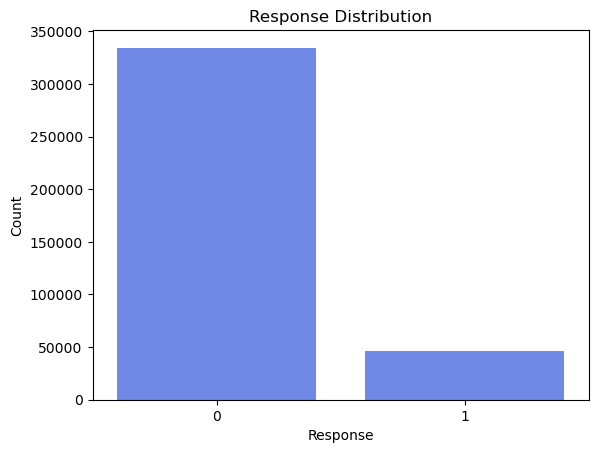

In [13]:
sns.countplot(x="Response", data=df,color='#5c7cfa')
plt.title("Response Distribution")
plt.xlabel("Response")
plt.ylabel("Count")
plt.show()

###  Response Distribution – Insight
Most customers did not respond positively to the insurance offer. This indicates that customer conversion is low and there is a need for better targeting and personalized marketing strategies.

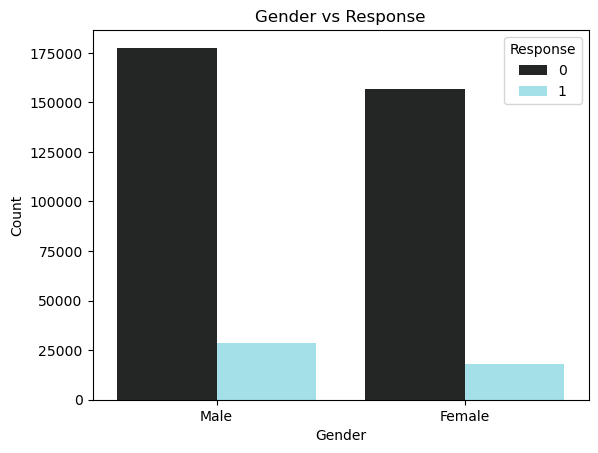

In [14]:
#Gender vs Response
sns.countplot(x="Gender", hue="Response", data=df,color='#99e9f2')
plt.title("Gender vs Response")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

###  Gender Distribution – Insight
The distribution of customers across gender is fairly balanced. Gender does not show a strong impact on customer response, suggesting that response behavior is independent of gender.

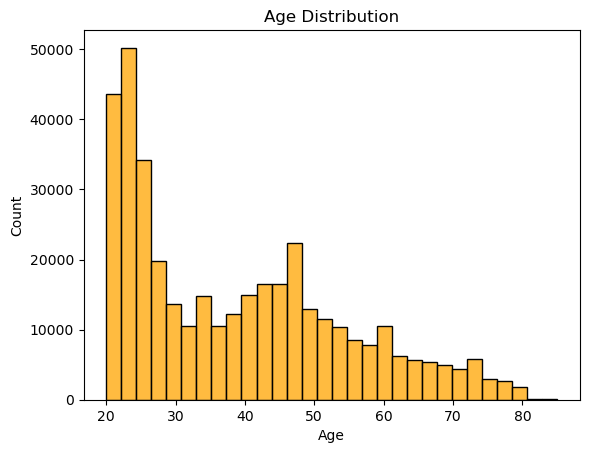

In [15]:
#Age Distribution
sns.histplot(df["Age"], bins=30, color="orange")
plt.title("Age Distribution")
plt.show()

###  Age Distribution – Insight
Most customers fall between the age range of 25 to 50 years. This age group represents the major customer base and is important for insurance marketing campaigns.

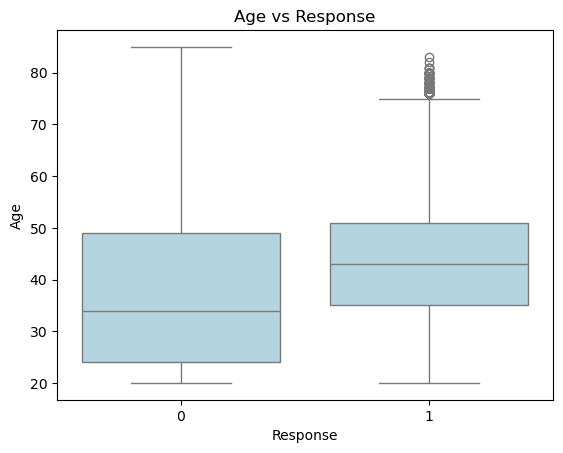

In [16]:
#Age vs Response
sns.boxplot(x="Response", y="Age", data=df, color="lightblue")
plt.title("Age vs Response")
plt.show()

###  Age vs Response – Insight
Middle-aged customers tend to respond slightly more compared to very young customers. This suggests that age has a moderate influence on insurance interest.

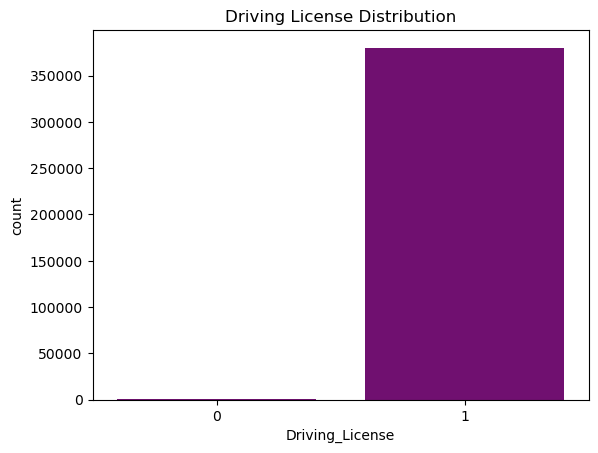

In [17]:
#Driving License Distribution
sns.countplot(x="Driving_License", data=df, color="purple")
plt.title("Driving License Distribution")
plt.show()

###  Driving License Distribution – Insight
Almost all customers possess a valid driving license, which indicates that the dataset mainly consists of active vehicle users.

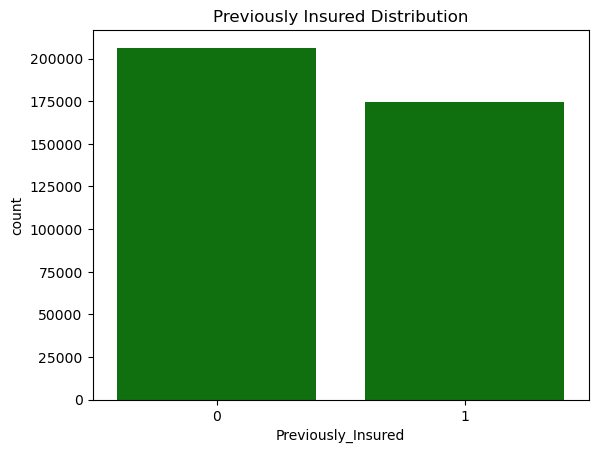

In [18]:
#Previously Insured Distribution
sns.countplot(x="Previously_Insured", data=df, color="green")
plt.title("Previously Insured Distribution")
plt.show()

### Previously Insured – Insight
Customers who were not previously insured show higher interest in the policy. This highlights a strong opportunity for targeting first-time insurance buyers.

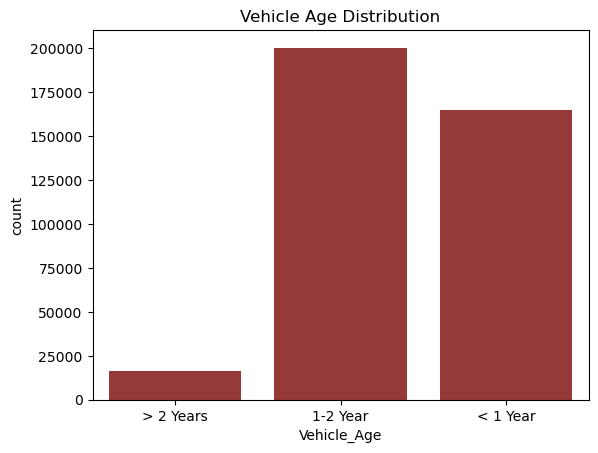

In [19]:
#Vehicle Age Distribution
sns.countplot(x="Vehicle_Age", data=df, color="brown")
plt.title("Vehicle Age Distribution")
plt.show()

###  Vehicle Age Distribution – Insight
A large number of vehicles are older than one year. Older vehicles generally carry higher risk, making insurance more relevant for these customers.

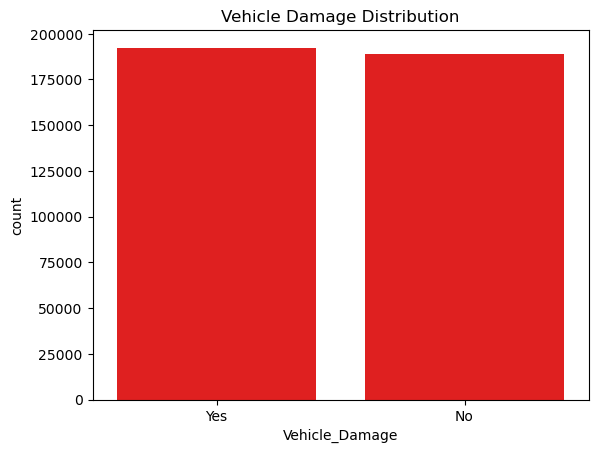

In [20]:
#Vehicle Damage Distribution
sns.countplot(x="Vehicle_Damage", data=df, color="red")
plt.title("Vehicle Damage Distribution")
plt.show()

###  Vehicle Damage – Insight
Customers whose vehicles were previously damaged show a higher response rate. Vehicle damage is one of the strongest indicators influencing insurance interest.

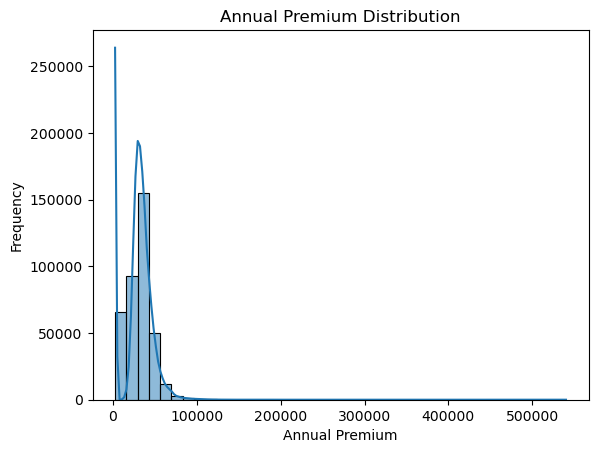

In [21]:
#Annual Premium Distribution
sns.histplot(df["Annual_Premium"], bins=40, kde=True)
plt.title("Annual Premium Distribution")
plt.xlabel("Annual Premium")
plt.ylabel("Frequency")
plt.show()

### Annual Premium Distribution – Insight
Annual premium values are right-skewed, with most customers paying moderate premiums. Extremely high premium values are less common.

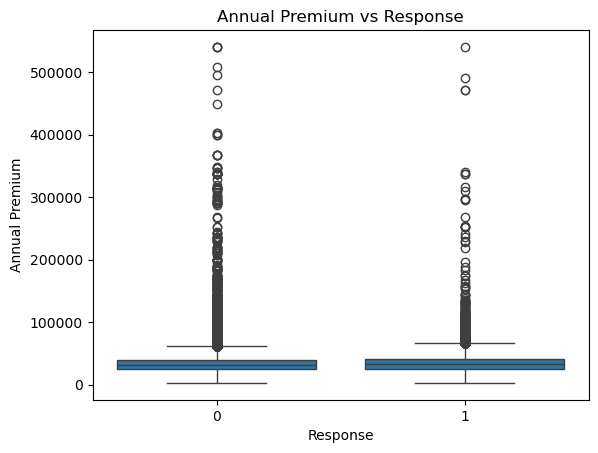

In [22]:
#Annual Premium vs Response
sns.boxplot(x="Response", y="Annual_Premium", data=df)
plt.title("Annual Premium vs Response")
plt.xlabel("Response")
plt.ylabel("Annual Premium")
plt.show()

###  Annual Premium vs Response – Insight
Customers with moderate annual premiums are more responsive. Very high premium amounts may reduce customer willingness to opt for insurance.

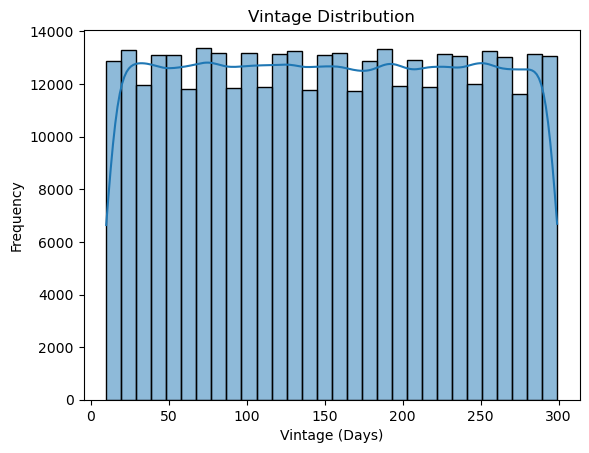

In [23]:
#Vintage Distribution
sns.histplot(df["Vintage"], bins=30, kde=True)
plt.title("Vintage Distribution")
plt.xlabel("Vintage (Days)")
plt.ylabel("Frequency")
plt.show()

### Vintage Distribution – Insight
Customers with longer association duration are well represented in the dataset, indicating a stable customer base.

##  Conclusion

This exploratory data analysis helped in understanding customer behavior related to vehicle insurance policies and identifying the factors that influence customer response. By analyzing customer demographics, vehicle details, and insurance history, several meaningful patterns were observed.

The analysis shows that **vehicle-related factors play a more important role than basic demographics**. Customers owning older vehicles and vehicles with prior damage are more likely to show interest in insurance, which is expected as such vehicles carry higher risk. Similarly, customers who were not previously insured tend to respond more positively, indicating a strong opportunity for acquiring new customers.

Age has a moderate impact on customer response, with middle-aged customers showing slightly higher interest compared to younger customers. On the other hand, **gender does not significantly affect insurance response**, suggesting that marketing strategies should not be gender-focused.

Premium analysis indicates that customers with **moderate annual premiums** are more responsive, while very high premiums may discourage interest. Sales channel analysis highlights that some channels are more effective than others, which can help businesses optimize their distribution strategy.

Overall, this EDA provides clear insights that can support better **customer targeting, risk assessment, and policy marketing decisions**. These findings can further be used as a foundation for predictive modeling and advanced analytics in vehicle insurance.

---